# Solow Growth Model: Increase in s

## Initialization: Setting Up the Environment:

KEEP OUTPUT CELLS FROM SHIFTING TO AUTOSCROLL

In [3]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
# KEEP GRAPHICS IN THE MAIN NOTEBOOK FLOW

%matplotlib inline 

In [5]:
# GRAPHICS SETUP 
#
# seaborn-whitegrid styles and figure size...

from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 10
figure_size[1] = 7
plt.rcParams["figure.figsize"] = figure_size

In [6]:
# IMPORT LIBRARIES...

import numpy as np
import pandas as pd

In [7]:
# DEFINE OUR SOLOW GROWTH MODEL SIMULATION FUNCTION...
#
# we are going to want to see what happens for lots of
# different model parameter values and initial conditions,
# so stuff everything inside a function, so we can then
# invoke it with a single line...

def sgm_2_200yr_run(L0, E0, 
    n=0, g=0, s=0.15, 
    alpha=0.5, delta=0.025, 
    delta_n = 0, delta_g = 0, delta_s = 0, 
    T = 200):

    sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio'],
        dtype='float')

    sg_df.Labor[0] = L0
    sg_df.Efficiency[0] = E0
    sg_df.Capital_Output_Ratio[0] = s/(n+g+delta)
    sg_df.Output[0] = sg_df.Capital_Output_Ratio[0]**(alpha/(1-alpha)) * sg_df.Labor[0] * sg_df.Efficiency[0]
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital = sg_df.Capital_Output_Ratio[0] * sg_df.Output[0]
    
    s = s + delta_s
    g = g + delta_g
    n = n + delta_n

    for i in range(T):
        sg_df.Labor[i+1] = sg_df.Labor[i] + sg_df.Labor[i] * n
        sg_df.Efficiency[i+1] = sg_df.Efficiency[i] + sg_df.Efficiency[i] * g
        sg_df.Capital[i+1] = sg_df.Capital[i] - sg_df.Capital[i] * delta + sg_df.Output[i] * s 
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = sg_df.Capital[i+1]/sg_df.Output[i+1]

        
    fig = plt.figure(figsize=(12, 12))

    ax1 = plt.subplot(2,3,1)
    sg_df.Labor.plot(ax = ax1, title = "Labor Force")
    plt.ylabel("Values")

    ax2 = plt.subplot(2,3,2)
    sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")

    ax3 = plt.subplot(2,3,3)
    sg_df.Capital.plot(ax = ax3, title = "Capital Stock")

    ax4 = plt.subplot(2,3,4)
    sg_df.Output.plot(ax = ax4, title = "Output")
    plt.ylabel("Values")
    plt.xlabel("Years")

    ax5 = plt.subplot(2,3,5)
    sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
    plt.xlabel("Years")

    ax6 = plt.subplot(2,3,6)
    sg_df.Capital_Output_Ratio.plot(ax = ax6, title = "Capital-Output Ratio")
    plt.xlabel("Years")

    plt.suptitle('Solow Growth Model: Simulation Run', size = 20)

    plt.show()

    print(alpha, "is the orientation-of-growth-toward-capital parameter: alpha")
    print(delta, "is the depreciation rate: delta")

    if (delta_n != 0):
        print(n, "is the alternative labor-force growth rate: n'")
        print(n - delta_n, "is the baseline labor-force growth rate: n")        
    else:
        print(n, "is the labor force growth rate: n")
    
    if (delta_g != 0):
        print(g, "is the alternative efficiency-of-labor growth rate: g'")
        print(g - delta_g, "is the baseline efficiency-of-labor growth rate: g")                
    else:
        print(g, "is the efficiency of labor growth rate: g")
    
    if (delta_s != 0):
        print(s, "is the alternative post-jump savings-investment share: s'")
        print(s - delta_s, "is the baseline pre-jump savings-investment share: s")
    else:
        print(s, "is the savings-investment share: s")

print("Function creation ran without visible errors")

Function creation ran without visible errors


----

&nbsp;

## The Solow Growth Model: Increase in s

Recall the four behavioral relationships in the Solow growth model: the determination of the labor-force L growth rate as equal to the parameter n; the efficiency-of-labor E growth rate as equal to the parameter g; the capital stock K growth rate as a function of the savings-investment share s of output Y, of the depreciation rate &delta;, and of the current output-to-capital ratio Y/K; and the production function determining the current level of output Y as a function of the current levels of the capital stock K, the labor force L, the efficiency-of-labor E, and the production function parameter—I don't have a good name for it—&alpha; (perhaps I should start calling it the relative capital orientation of growth: when &alpha; is zero capital accumulation does not matter for growth, and as &alpha; rises toward one it becomes more and more important for growth until, when it equals one, it is all that matters):

$ \frac{d(ln(L))}{dt} = n $

$ \frac{d(ln(E))}{dt} = g $

$ \frac{d(ln(K))}{dt} = \frac{sY}{K} - \delta $

$ ln(Y) = \alpha(ln(K)) + (1-\alpha)(ln(L) + ln(E)) $

Let's start an economy modeled by this with some set of parameter values and in an initial position on its balanced-growth path. Let's then do a once-and-for-all permanent boost to the savings-investment share of output s by an amount &Delta;s, so that the savings-investment share is no longer its baseline value s but instead the alternative value s':

$ s' = s + {\Delta}s $

Let's then let the economy develop over time according to its behavioral relationships. And let's see what happens:

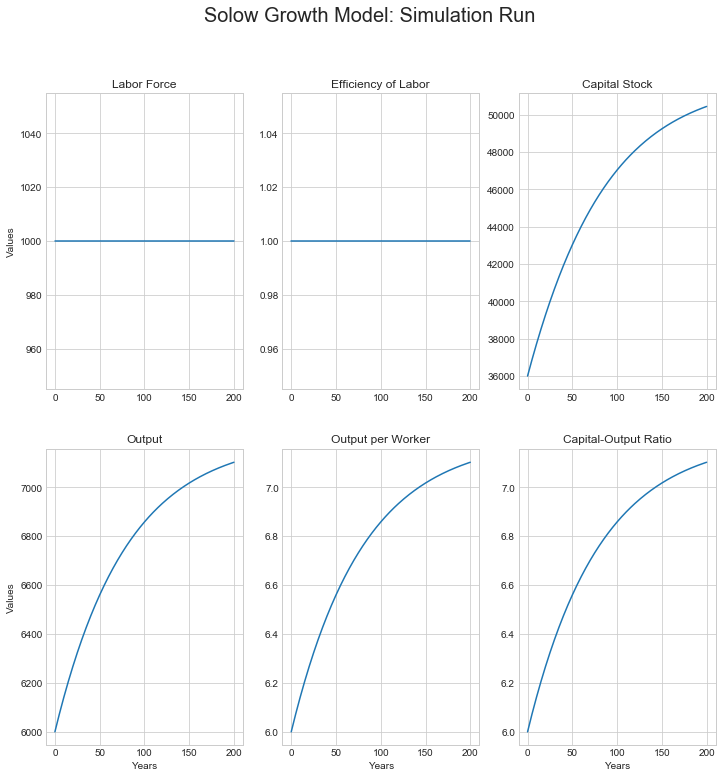

0.5 is the orientation-of-growth-toward-capital parameter: alpha
0.025 is the depreciation rate: delta
0 is the labor force growth rate: n
0 is the efficiency of labor growth rate: g
0.18 is the alternative post-jump savings-investment share: s'
0.15 is the baseline pre-jump savings-investment share: s


In [13]:
# start with a model with no labor force or
# efficiency of labor growth...

sgm_2_200yr_run(L0 = 1000, E0 = 1, g = 0, n = 0,
    s = 0.15, delta_s = 0.03)

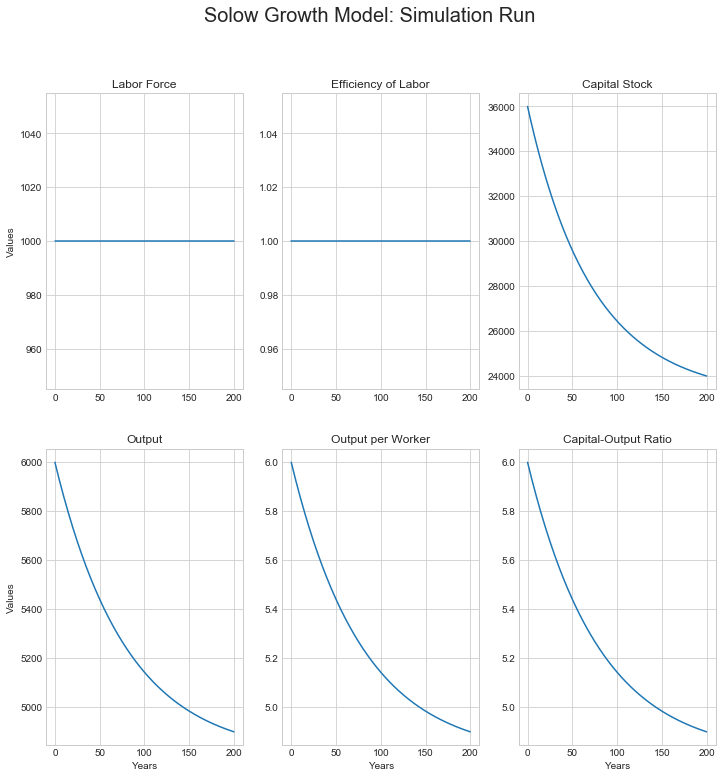

0.5 is the orientation-of-growth-toward-capital parameter: alpha
0.025 is the depreciation rate: delta
0 is the labor force growth rate: n
0 is the efficiency of labor growth rate: g
0.12 is the alternative post-jump savings-investment share: s'
0.15 is the baseline pre-jump savings-investment share: s


In [14]:
# it works in reverse...
#
# start with a model with no labor force or
# efficiency of labor growth...

sgm_2_200yr_run(L0 = 1000, E0 = 1, g = 0, n = 0,
    s = 0.15, delta_s = -0.03)

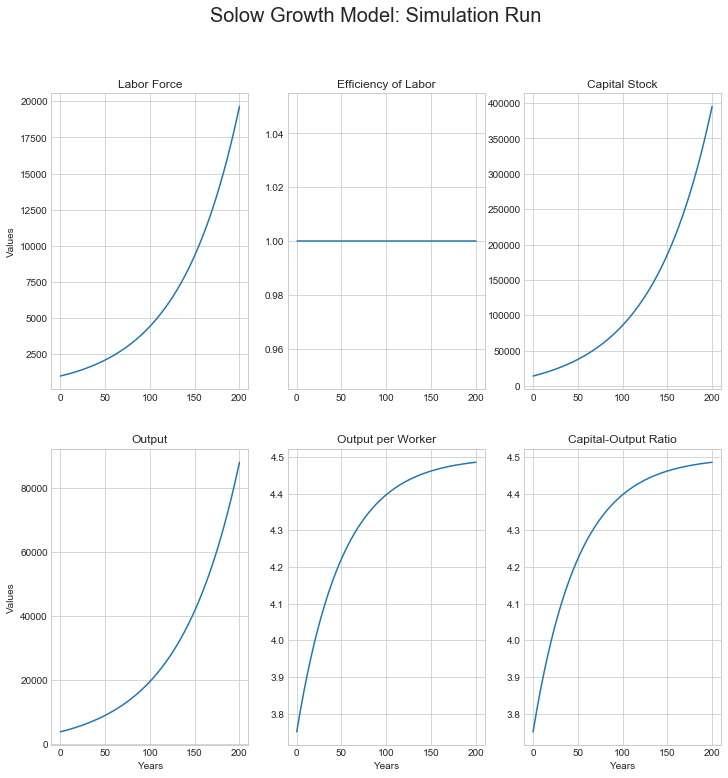

0.5 is the orientation-of-growth-toward-capital parameter: alpha
0.025 is the depreciation rate: delta
0.015 is the labor force growth rate: n
0 is the efficiency of labor growth rate: g
0.18 is the alternative post-jump savings-investment share: s'
0.15 is the baseline pre-jump savings-investment share: s


In [15]:
# Add in labor-force growth

sgm_2_200yr_run(L0 = 1000, E0 = 1, g = 0, n = 0.015,
    s = 0.15, delta_s = 0.03, T=200)

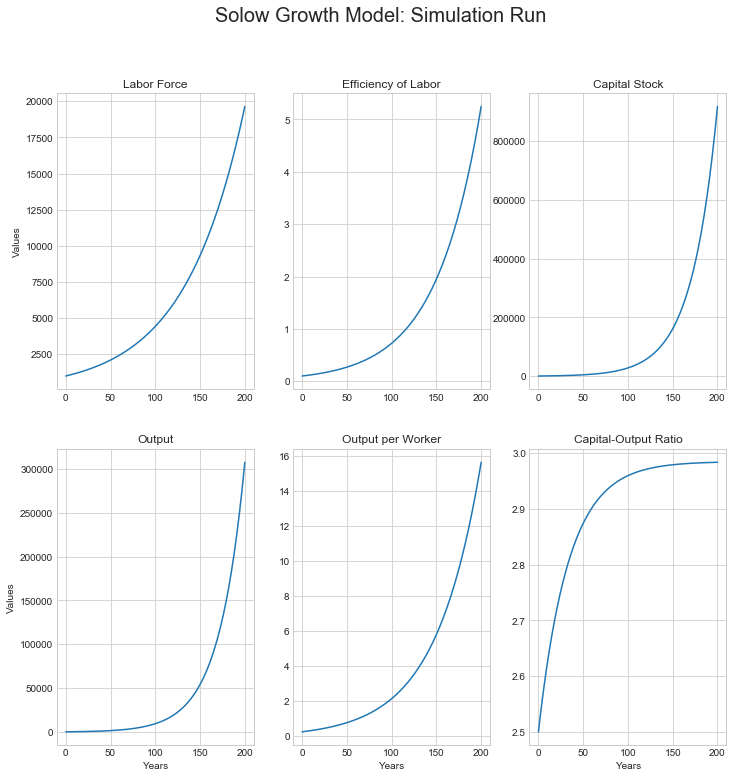

0.5 is the orientation-of-growth-toward-capital parameter: alpha
0.025 is the depreciation rate: delta
0.015 is the labor force growth rate: n
0.02 is the efficiency of labor growth rate: g
0.18 is the alternative post-jump savings-investment share: s'
0.15 is the baseline pre-jump savings-investment share: s


In [17]:
# Add in efficiency-of-labor growth

sgm_2_200yr_run(L0 = 1000, E0 = 0.1, g = 0.02, n = 0.015,
    s = 0.15, delta_s = 0.03, T=200)

$ \left(\frac{Y_t}{L_t}\right) = 
    \left(\frac{K_t}{Y_t}\right)^{\frac{\alpha}{1-\alpha}}E_t $
    
$ ln\left(\frac{Y_t}{L_t}\right) = 
    \left(\frac{\alpha}{1-\alpha}\right) ln\left(\frac{K_t}{Y_t}\right) + 
    ln\left(E_t\right) $
    
$ ln\left(\frac{Y_t}{L_t}\right)^* = 
    \left(\frac{\alpha}{1-\alpha}\right) ln\left(\frac{s}{n+g+\delta}\right) + 
    ln\left(E_t\right) $  
    
$ {ln\left(\frac{Y_t}{L_t}\right)^*}_{alt} - {ln\left(\frac{Y_t}{L_t}\right)^*}_{base} 
    = \left(\frac{\alpha}{1-\alpha}\right) 
    \left({ln\left(\frac{s+{\Delta}s}{n+g+\delta}\right)}_{alt} 
    - {ln\left(\frac{s}{n+g+\delta}\right)}_{base}\right) $   
     
for our parameter values:

$ {ln\left(\frac{Y_t}{L_t}\right)^*}_{alt} - {ln\left(\frac{Y_t}{L_t}\right)^*}_{base} $
$    = \left(\frac{\alpha}{1-\alpha}\right) $
$    \left({ln\left(4\right)} 
     - {ln\left({3.2}\right)}\right) $
$    = \left(\frac{\alpha}{1-\alpha}\right)ln(1.25) $

$ ln(1.25) = 0.25 - 0.03125 + 0.00521 - .00098 + 0.00020 - 0.00004 = 0.223 $

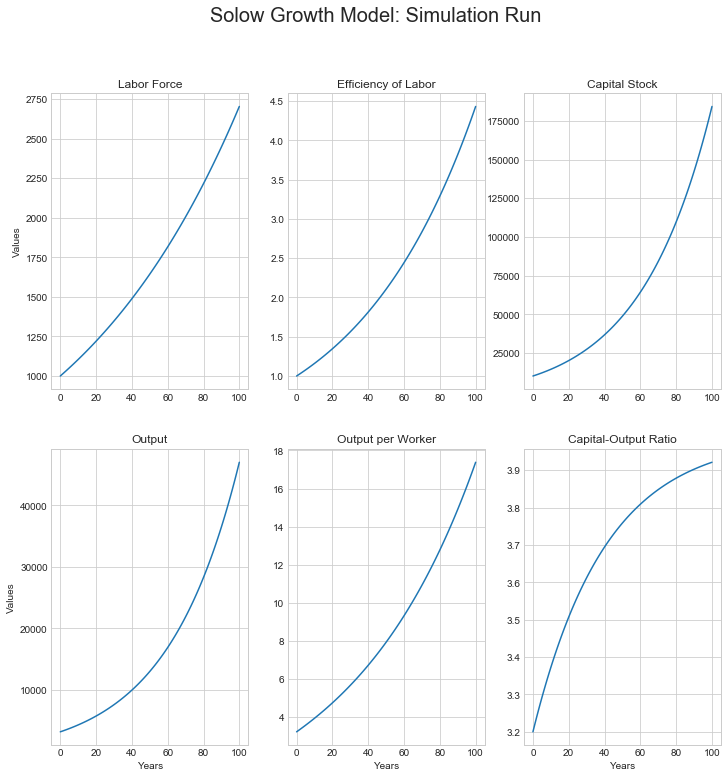

0.5 is the orientation-of-growth-toward-capital parameter: alpha
0.025 is the depreciation rate: delta
0.01 is the labor force growth rate: n
0.015 is the efficiency of labor growth rate: g
0.2 is the alternative post-jump savings-investment share: s'
0.16 is the baseline pre-jump savings-investment share: s


In [12]:
sgm_2_200yr_run(L0 = 1000, E0 = 1, g = 0.015, n = 0.01,
    s = 0.16, delta_s = 0.04, T=100)

----

&nbsp;

## Appendix: Programming Advice:

1. **Do** restart your kernel and run cells up to your current working point every fifteen minutes or so. Yes, it takes a little time. But if you don't, sooner or later the machine's namespace will get confused, and then you will get confused about the state of the machine's namespace, and by assuming things about it that are false you will lose hours and hours...

2. **Do** reload the page when restarting the kernel does not seem to do the job...

3. **Do** edit code cells by copying them below your current version and then working on the copy: when you break everything in the current cell (as you will), you can then go back to the old cell and start fresh...

4. **Do** exercise agile development practices: if there is a line of code that you have not tested, test it. The best way to test is to ask the machine to echo back to you the thing you have just created in its namespace to make sure that it is what you want it to be. Only after you are **certain** that your namespace contains what you think it does should you write the next line of code. And then you should immediately test it...

5. **Do** take screenshots of your error messages...

6. **Do** google your error messages: Ms. Google is your best friend here...

7. **Do not** confuse assignment ("=") and test for equality ("=="). In general, if there is an "if" anywhere nearby, you should be testing for equality. If there is not, you should be assignment a variable in your namespace to a value. **Do** curse the mathematicians 500 years ago who did not realize that in the twenty-first century it would be very convenient if we had different and not confusable symbols for equals-as-assignment and equals-as-test...

Any more insights you think belong on this list? Email them to me at brad.delong@gmail.com